In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [75]:
customers = pd.read_csv('https://raw.githubusercontent.com/jacobshamah/MDA620-Final-Project/main/Customer_data.csv')

## Dataset Pre-Processing

#### Customers dataset information

In [76]:
# first 5 rows of dataset
customers.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [77]:
# dataset dimensions
customers.shape

(10695, 10)

In [78]:
# Dataset information for each column
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 835.7+ KB


In [79]:
customers['Var_1'].unique()

array(['Cat_6', 'Cat_4', 'Cat_3', nan, 'Cat_1', 'Cat_2', 'Cat_5', 'Cat_7'],
      dtype=object)

In [80]:
# check for NA's in columns
customers.isna().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
dtype: int64

#### Modifying the dataframe

##### Dropping NA values

In [81]:
# Chack for NAs in rows and delete the NA values 
row_NA = customers.isnull().any(axis = 1)

print(row_NA.sum())

customers.dropna(inplace = True)

1876


##### Dropping unnecessary columns 

In [82]:
# Dropping the ID column as it has no application in my analysis
customers.drop('ID', axis = 1, inplace = True)

In [83]:
# shape of dataframe after modifying
customers.shape

(8819, 9)

In [84]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8819 entries, 0 to 10694
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8819 non-null   object 
 1   Ever_Married     8819 non-null   object 
 2   Age              8819 non-null   int64  
 3   Graduated        8819 non-null   object 
 4   Profession       8819 non-null   object 
 5   Work_Experience  8819 non-null   float64
 6   Spending_Score   8819 non-null   object 
 7   Family_Size      8819 non-null   float64
 8   Var_1            8819 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 689.0+ KB


##### Creating column 'Age Bin' 

In [85]:
customers['Age'].nunique()

67

In [86]:
customers['Age'].min()

18

In [87]:
customers['Age'].max()

89

In [88]:
# Create a list of bins at decade intervals
bins = list(range(10, 100, 10))

# Create a list of custom labels for each bin
labels = ['Teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s']

# Create a new column 'age bin' by applying pd.cut to the 'Age' column
customers['Age Bin'] = pd.cut(customers['Age'], bins=bins, labels=labels, right=False)

# Check the result
customers.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Age Bin
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,30s
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,30s
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,50s
5,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,40s
6,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,60s


In [89]:
# moving the age bin column next to age column

# Use pop to remove age bin column
age_bin = customers.pop('Age Bin')

# Insert the 'age bin' column into the Dataframe at position 3
customers.insert(3, 'Age Bin', age_bin)

customers.head()

,Gender,Ever_Married,Age,Age Bin,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,30s,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,30s,Yes,Healthcare,8.0,Average,4.0,Cat_6
3,Male,Yes,59,50s,No,Executive,11.0,High,2.0,Cat_6
5,Male,Yes,47,40s,Yes,Doctor,0.0,High,5.0,Cat_4
6,Male,Yes,61,60s,Yes,Doctor,5.0,Low,3.0,Cat_6


In [90]:
customers['Age Bin'].unique()

['30s', '50s', '40s', '60s', 'Teens', '20s', '80s', '70s']
Categories (8, object): ['Teens' < '20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s']

##### Changing float columns to integer

In [91]:
customers[['Work_Experience', 'Family_Size']] = customers[['Work_Experience', 'Family_Size']].astype(int)

In [92]:
customers.head()

,Gender,Ever_Married,Age,Age Bin,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,30s,Yes,Engineer,0,Low,1,Cat_6
1,Male,Yes,37,30s,Yes,Healthcare,8,Average,4,Cat_6
3,Male,Yes,59,50s,No,Executive,11,High,2,Cat_6
5,Male,Yes,47,40s,Yes,Doctor,0,High,5,Cat_4
6,Male,Yes,61,60s,Yes,Doctor,5,Low,3,Cat_6


##### Converting object columns to categorical

In [93]:
customers[['Gender', 'Ever_Married', 'Graduated', 'Spending_Score']] = customers[['Gender', 'Ever_Married', 'Graduated', 'Spending_Score']].astype('category')

In [94]:
customers.head()

,Gender,Ever_Married,Age,Age Bin,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,30s,Yes,Engineer,0,Low,1,Cat_6
1,Male,Yes,37,30s,Yes,Healthcare,8,Average,4,Cat_6
3,Male,Yes,59,50s,No,Executive,11,High,2,Cat_6
5,Male,Yes,47,40s,Yes,Doctor,0,High,5,Cat_4
6,Male,Yes,61,60s,Yes,Doctor,5,Low,3,Cat_6


In [95]:
customers.head()

,Gender,Ever_Married,Age,Age Bin,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,30s,Yes,Engineer,0,Low,1,Cat_6
1,Male,Yes,37,30s,Yes,Healthcare,8,Average,4,Cat_6
3,Male,Yes,59,50s,No,Executive,11,High,2,Cat_6
5,Male,Yes,47,40s,Yes,Doctor,0,High,5,Cat_4
6,Male,Yes,61,60s,Yes,Doctor,5,Low,3,Cat_6


## Data Exploration and Visualizations

### Visualizations

#### Exploring the relationship between marriage and spending score

C:\Users\jacob\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jacob\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Ever_Married', ylabel='count'>

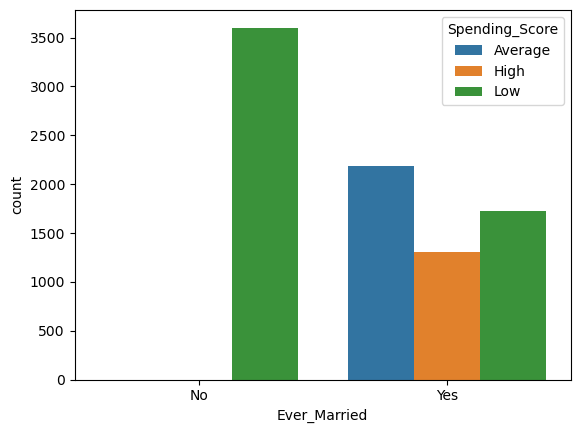

In [96]:
sns.countplot(data= customers, x="Ever_Married", hue="Spending_Score")

#### Exploring the relationship between Family Size and Spending score

C:\Users\jacob\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jacob\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Spending_Score', ylabel='Family_Size'>

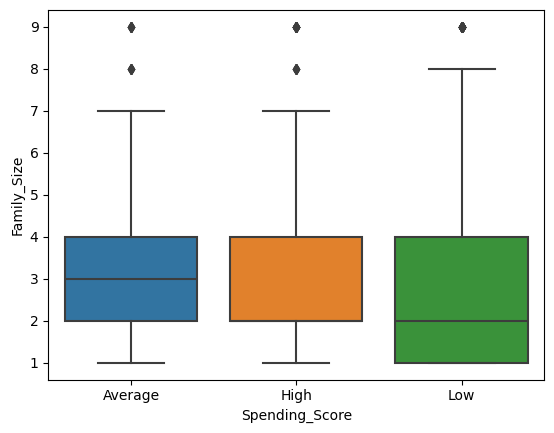

In [97]:
#boxplot Family Size and Spending Score using seaborn package 

sns.boxplot(data= customers, x="Spending_Score", y="Family_Size")

#### Distribution of Family Size

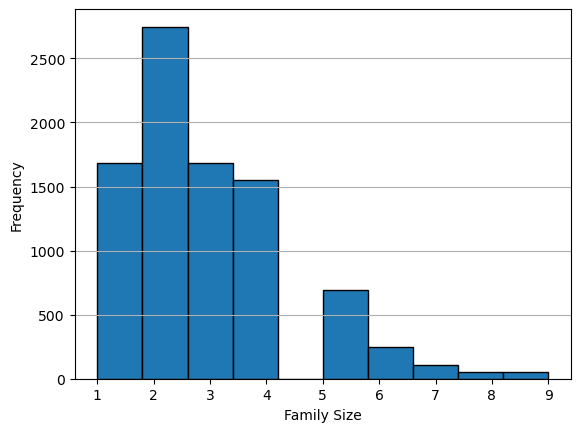

In [98]:
# histogram for the family size column
customers["Family_Size"].hist(edgecolor="black")

# x-axis label
plt.xlabel("Family Size")

# y-axis label
plt.ylabel("Frequency")

# removing Grid lines
plt.grid(axis="x", visible =False)

#### Distribution of Age

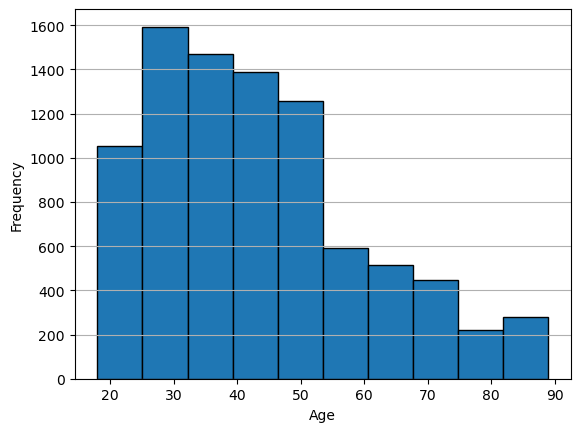

In [99]:
# histogram for the age column
customers["Age"].hist(edgecolor="black")

# x-axis label
plt.xlabel("Age")

# y-axis label
plt.ylabel("Frequency")

# removing Grid lines
plt.grid(axis="x", visible =False)

#### Stacked Bar of Age Bins and Family Size

In [100]:
kid_counts = customers.groupby('Age Bin')['Family_Size'].value_counts() # counts family size per age group

# reshape the series into a dataframe
kid_counts = kid_counts.unstack(level=1)

C:\Users\jacob\AppData\Local\Temp\ipykernel_23644\2562635084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kid_counts = customers.groupby('Age Bin')['Family_Size'].value_counts() # counts family size per age group


In [101]:
kid_counts

Family_Size,1,2,3,4,5,6,7,8,9
Age Bin,,,,,,,,,
Teens,3,21,78,93,51,21,7,5,3
20s,167,330,401,411,207,85,35,32,20
30s,448,642,414,360,167,68,28,8,14
40s,461,604,332,321,139,37,16,3,7
50s,231,349,256,251,86,25,8,4,3
60s,148,332,136,91,31,12,7,2,6
70s,112,270,45,21,8,2,3,0,1
80s,110,199,24,5,1,0,1,0,0


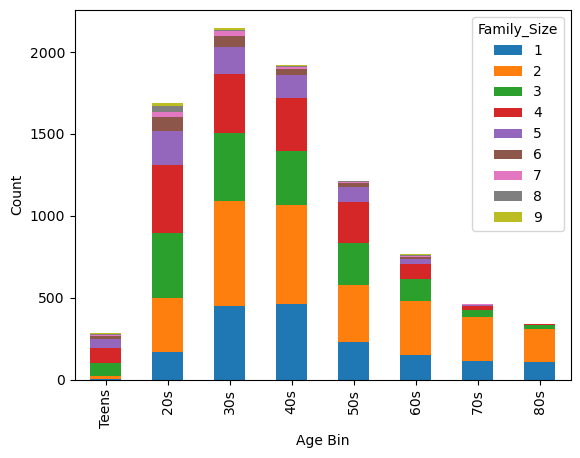

In [102]:
kid_counts.plot.bar(stacked=True)

# add x-axis label
plt.xlabel("Age Bin")

# add y-axis label
plt.ylabel("Count")

# show the plot
plt.show()

#### Count Plot of customer categories

C:\Users\jacob\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jacob\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jacob\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Var_1', ylabel='count'>

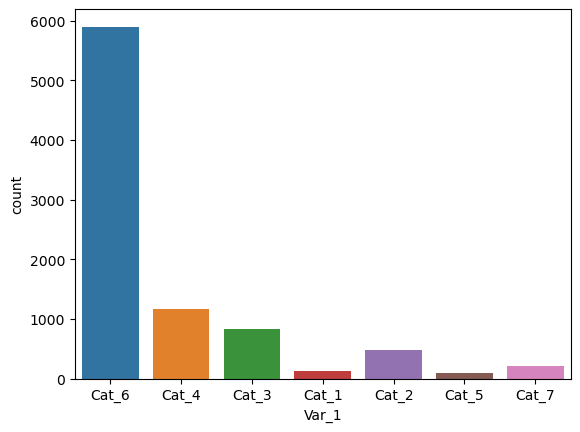

In [103]:
sns.countplot(data= customers, x="Var_1")

## Prediction Models

### Modifying data for model building

##### Label Encoding - Gender

In [104]:
# creating label encoder object
le = LabelEncoder()

# fit & transform 'Gender' column
customers['Gender'] = le.fit_transform(customers['Gender'])

# check the encoded values
print(le.classes_)
print(le.transform(le.classes_))

# female = 0, male = 1

['Female' 'Male']
[0 1]


##### Label Encoding - Graduated

In [105]:
# creating label encoder object
le = LabelEncoder()

# fit & transform 'Gender' column
customers['Graduated'] = le.fit_transform(customers['Graduated'])

# check the encoded values
print(le.classes_)
print(le.transform(le.classes_))

# no = 0, yes = 1

['No' 'Yes']
[0 1]


##### Label Encoding - Graduated

In [106]:
# creating label encoder object
le = LabelEncoder()

# fit & transform 'Gender' column
customers['Ever_Married'] = le.fit_transform(customers['Ever_Married'])

# check the encoded values
print(le.classes_)
print(le.transform(le.classes_))

# no = 0, yes = 1

['No' 'Yes']
[0 1]


##### Dummy Variables for Profession

In [107]:
customers['Profession'].unique()

array(['Engineer', 'Healthcare', 'Executive', 'Doctor', 'Artist',
       'Lawyer', 'Entertainment', 'Homemaker', 'Marketing'], dtype=object)

In [108]:
customers = pd.get_dummies(customers, columns=['Profession'])

In [109]:
customers

,Gender,Ever_Married,Age,Age Bin,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0,1,36,30s,1,0,Low,1,Cat_6,False,False,True,False,False,False,False,False,False
1,1,1,37,30s,1,8,Average,4,Cat_6,False,False,False,False,False,True,False,False,False
3,1,1,59,50s,0,11,High,2,Cat_6,False,False,False,False,True,False,False,False,False
5,1,1,47,40s,1,0,High,5,Cat_4,False,True,False,False,False,False,False,False,False
6,1,1,61,60s,1,5,Low,3,Cat_6,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10689,1,1,41,40s,1,0,High,5,Cat_6,True,False,False,False,False,False,False,False,False
10691,1,0,35,30s,0,3,Low,4,Cat_4,False,False,False,False,True,False,False,False,False
10692,0,0,33,30s,1,1,Low,1,Cat_6,False,False,False,False,False,True,False,False,False
10693,0,0,27,20s,1,1,Low,4,Cat_6,False,False,False,False,False,True,False,False,False


##### Replacing Values - Spending score

In [110]:
# Using replace method
# low = 0, average = 1, high = 2
customers['Spending_Score'] = customers['Spending_Score'].replace({'Low': 0, 'Average': 1, 'High': 2})

In [111]:
customers.head()

,Gender,Ever_Married,Age,Age Bin,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0,1,36,30s,1,0,0,1,Cat_6,False,False,True,False,False,False,False,False,False
1,1,1,37,30s,1,8,1,4,Cat_6,False,False,False,False,False,True,False,False,False
3,1,1,59,50s,0,11,2,2,Cat_6,False,False,False,False,True,False,False,False,False
5,1,1,47,40s,1,0,2,5,Cat_4,False,True,False,False,False,False,False,False,False
6,1,1,61,60s,1,5,0,3,Cat_6,False,True,False,False,False,False,False,False,False


### Models

In [112]:
customers.drop(columns = ['Age Bin', 'Var_1'], axis = 1).corr()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
Gender,1.000000,0.112218,0.013429,-0.051309,-0.055137,0.066841,0.064042,-0.049481,0.004089,-0.215781,0.135897,0.231433,0.040144,-0.122170,-0.040320,-0.032841
Ever_Married,0.112218,1.000000,0.570625,0.203280,-0.099169,0.613224,-0.087020,0.164611,-0.075566,0.019078,0.017917,0.202213,-0.418898,-0.015146,0.204137,-0.094549
Age,0.013429,0.570625,1.000000,0.247272,-0.187907,0.437695,-0.282495,0.117287,-0.113312,-0.041315,-0.021687,0.130926,-0.439167,-0.052917,0.546968,-0.072647
Graduated,-0.051309,0.203280,0.247272,1.000000,0.038245,0.110356,-0.245660,0.368290,-0.026411,-0.107034,-0.008875,-0.062599,-0.250837,-0.028509,0.000982,-0.102662
Work_Experience,-0.055137,-0.099169,-0.187907,0.038245,1.000000,-0.077981,-0.070434,0.017806,-0.004303,0.001759,0.016682,-0.021834,-0.008820,0.183433,-0.116978,-0.011770
Spending_Score,0.066841,0.613224,0.437695,0.110356,-0.077981,1.000000,0.092258,0.036478,-0.081246,-0.032150,-0.063279,0.356077,-0.266338,-0.024882,0.219384,-0.073416
Family_Size,0.064042,-0.087020,-0.282495,-0.245660,-0.070434,0.092258,1.000000,-0.162648,0.007876,0.024558,-0.021792,0.107069,0.249869,-0.056849,-0.161770,0.034490
Profession_Artist,-0.049481,0.164611,0.117287,0.368290,0.017806,0.036478,-0.162648,1.000000,-0.220101,-0.216902,-0.258334,-0.197164,-0.304928,-0.113935,-0.200572,-0.136496
Profession_Doctor,0.004089,-0.075566,-0.113312,-0.026411,-0.004303,-0.081246,0.007876,-0.220101,1.000000,-0.098043,-0.116771,-0.089121,-0.137832,-0.051500,-0.090661,-0.061698
Profession_Engineer,-0.215781,0.019078,-0.041315,-0.107034,0.001759,-0.032150,0.024558,-0.216902,-0.098043,1.000000,-0.115074,-0.087826,-0.135828,-0.050752,-0.089344,-0.060801


#### Model 1 - Decision Tree

In [113]:
customers.head()

,Gender,Ever_Married,Age,Age Bin,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0,1,36,30s,1,0,0,1,Cat_6,False,False,True,False,False,False,False,False,False
1,1,1,37,30s,1,8,1,4,Cat_6,False,False,False,False,False,True,False,False,False
3,1,1,59,50s,0,11,2,2,Cat_6,False,False,False,False,True,False,False,False,False
5,1,1,47,40s,1,0,2,5,Cat_4,False,True,False,False,False,False,False,False,False
6,1,1,61,60s,1,5,0,3,Cat_6,False,True,False,False,False,False,False,False,False


In [114]:
# Train Test Split

# Prediction variables
X = customers.drop(columns = ['Var_1', 'Age Bin'], axis =1)

# Predicted Variable
y = customers['Var_1']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
X.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size', 'Profession_Artist',
       'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing'],
      dtype='object')

In [116]:
# Model Building

# Creating model 
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# fitting model with train data
decision_tree.fit(X_train, y_train)

# Predictions
y_pred = decision_tree.predict(X_test)

In [117]:
# calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print(f'Accuracy: {accuracy:.2f}')

# calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy: 0.67
              precision    recall  f1-score   support

       Cat_1       0.00      0.00      0.00        21
       Cat_2       0.00      0.00      0.00       102
       Cat_3       0.00      0.00      0.00       162
       Cat_4       0.42      0.08      0.13       246
       Cat_5       0.00      0.00      0.00        19
       Cat_6       0.67      0.99      0.80      1173
       Cat_7       0.00      0.00      0.00        41

    accuracy                           0.67      1764
   macro avg       0.16      0.15      0.13      1764
weighted avg       0.51      0.67      0.55      1764



C:\Users\jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model 2 - Logistic Regression

In [118]:
# Train Test Split

# Prediction variables
X = customers.drop(columns = ['Var_1', 'Age Bin'], axis =1)

# Predicted Variable
y = customers['Var_1']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# create then fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', max_iter=10000) # bc the predicted column has more than two possible outcomes

model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

In [120]:
# calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print(f'Accuracy: {accuracy:.2f}')

# calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy: 0.67
              precision    recall  f1-score   support

       Cat_1       0.00      0.00      0.00        21
       Cat_2       0.00      0.00      0.00       102
       Cat_3       0.00      0.00      0.00       162
       Cat_4       0.48      0.11      0.18       246
       Cat_5       0.00      0.00      0.00        19
       Cat_6       0.68      0.99      0.81      1173
       Cat_7       0.00      0.00      0.00        41

    accuracy                           0.67      1764
   macro avg       0.17      0.16      0.14      1764
weighted avg       0.52      0.67      0.56      1764



C:\Users\jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model 3 - Logisitic Regression

In [121]:
# Train Test Split

# 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare',	'Profession_Homemaker',	'Profession_Lawyer','Profession_Marketing'
# Prediction variables
X = customers.drop(columns = ['Var_1', 'Age Bin', 'Age', 
                              'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 
                              'Profession_Executive', 'Profession_Healthcare',	'Profession_Homemaker',	'Profession_Lawyer',
                              'Profession_Marketing'], axis =1)

# Predicted Variable
y = customers['Var_1']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
X.columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Work_Experience',
       'Spending_Score', 'Family_Size'],
      dtype='object')

In [123]:
# create then fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', max_iter=10000) # bc the predicted column has more than two possible outcomes we use multinomial

model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

In [124]:
# calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print(f'Accuracy: {accuracy:.2f}')

# calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy: 0.67
              precision    recall  f1-score   support

       Cat_1       0.00      0.00      0.00        21
       Cat_2       0.00      0.00      0.00       102
       Cat_3       0.00      0.00      0.00       162
       Cat_4       0.48      0.10      0.16       246
       Cat_5       0.00      0.00      0.00        19
       Cat_6       0.68      0.99      0.80      1173
       Cat_7       0.00      0.00      0.00        41

    accuracy                           0.67      1764
   macro avg       0.17      0.16      0.14      1764
weighted avg       0.52      0.67      0.56      1764



C:\Users\jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jacob\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
